## Dataset Description:

Use the Glass dataset and apply the Random forest model.

1. Exploratory Data Analysis (EDA):

Perform exploratory data analysis to understand the structure of the dataset.
Check for missing values, outliers, inconsistencies in the data.

2. Data Visualization:

Create visualizations such as histograms, box plots, or pair plots to visualize the distributions and relationships between features.
Analyze any patterns or correlations observed in the data.

3. Data Preprocessing

    1. Check for missing values in the dataset and decide on a strategy for handling them.Implement the chosen strategy (e.g., imputation or removal) and explain your reasoning.
    2. If there are categorical variables, apply encoding techniques like one-hot encoding to convert them into numerical format.
    3. Apply feature scaling techniques such as standardization or normalization to ensure that all features are on a similar scale. Handling the imbalance data.

4. Random Forest Model Implementation
    1. Divide the data into train and test split.
    2. Implement a Random Forest classifier using Python and a machine learning library like scikit-learn.
    3. Train the model on the train dataset. Evaluate the performance on test data using metrics like accuracy, precision, recall, and F1-score.

5. Bagging and Boosting Methods
Apply the Bagging and Boosting methods and compare the results.


### Additional Notes:
1. Explain Bagging and Boosting methods. How is it different from each other.
2. Explain how to handle imbalance in the data.

In [54]:
import pandas as pd
df_info = pd.read_excel('glass.xlsx',sheet_name=0)
df_info

,Prepare a model for glass classification using Random Forest
0,Data Description:
1,RI : refractive index
2,Na: Sodium (unit measurement: weight percent i...
3,Mg: Magnesium
4,AI: Aluminum
5,Si: Silicon
6,K:Potassium
7,Ca: Calcium
8,Ba: Barium
9,Fe: Iron


In [55]:
df = pd.read_excel('glass.xlsx',sheet_name=1)
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [56]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [58]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

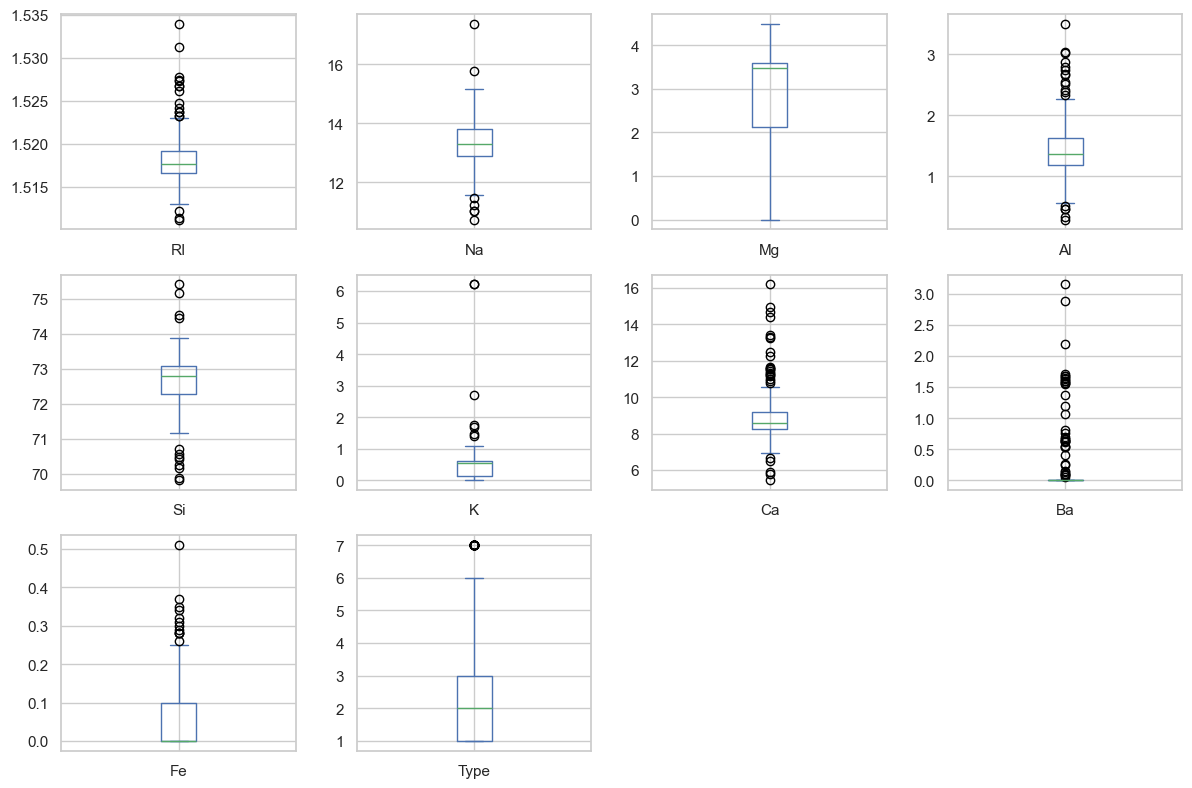

In [59]:
import matplotlib.pyplot as plt
df.plot(kind='box',subplots=True,layout=(3,4),figsize=(12,8))
plt.tight_layout()
plt.show()

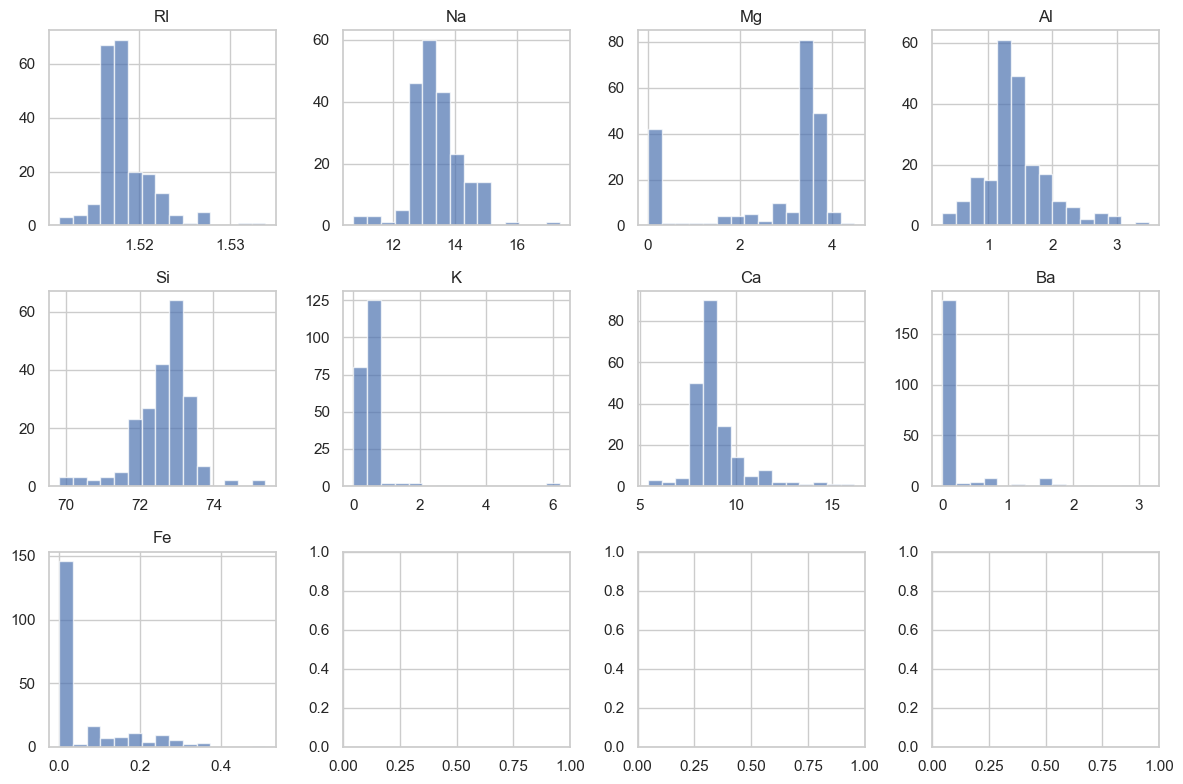

In [60]:
data, ax = plt.subplots(3,4,figsize=(12,8))
for i, column in enumerate(df.columns[:-1]):
    plt.subplot(3,4,i+1)
    plt.hist(df[column], bins=15, alpha=0.7)
    plt.title(column)
plt.tight_layout()
plt.show()

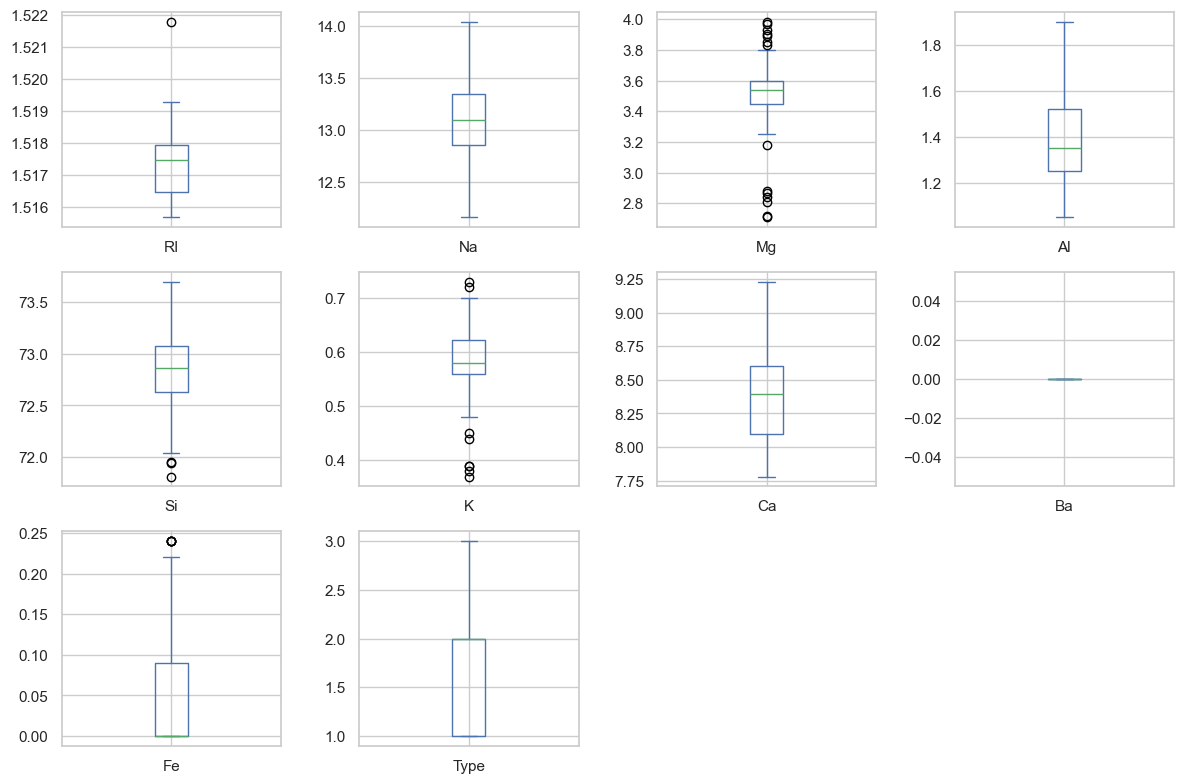

In [61]:
# fix outliers if any (not implemented here, just a placeholder)
for column in df.columns[:-1]:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
df.plot(kind='box',subplots=True,layout=(3,4),figsize=(12,8))
plt.tight_layout()
plt.show()

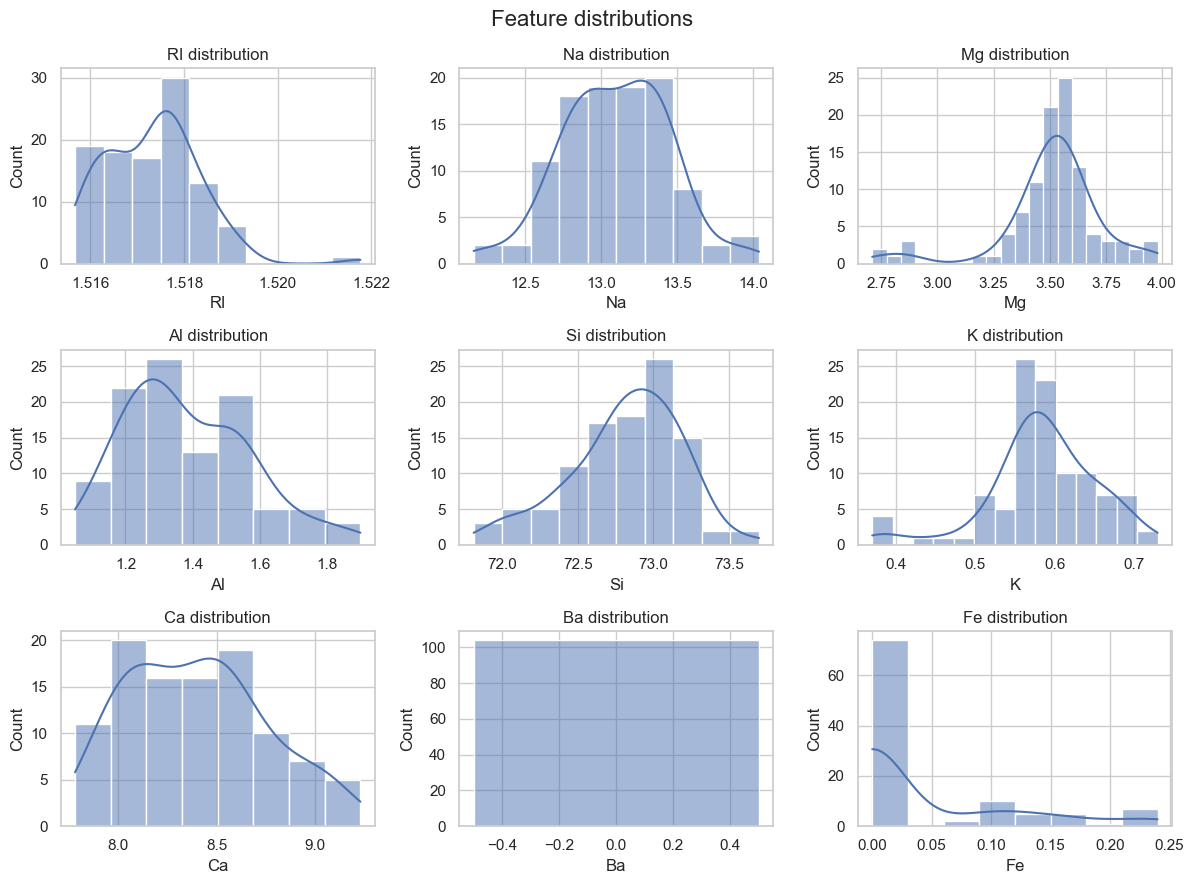

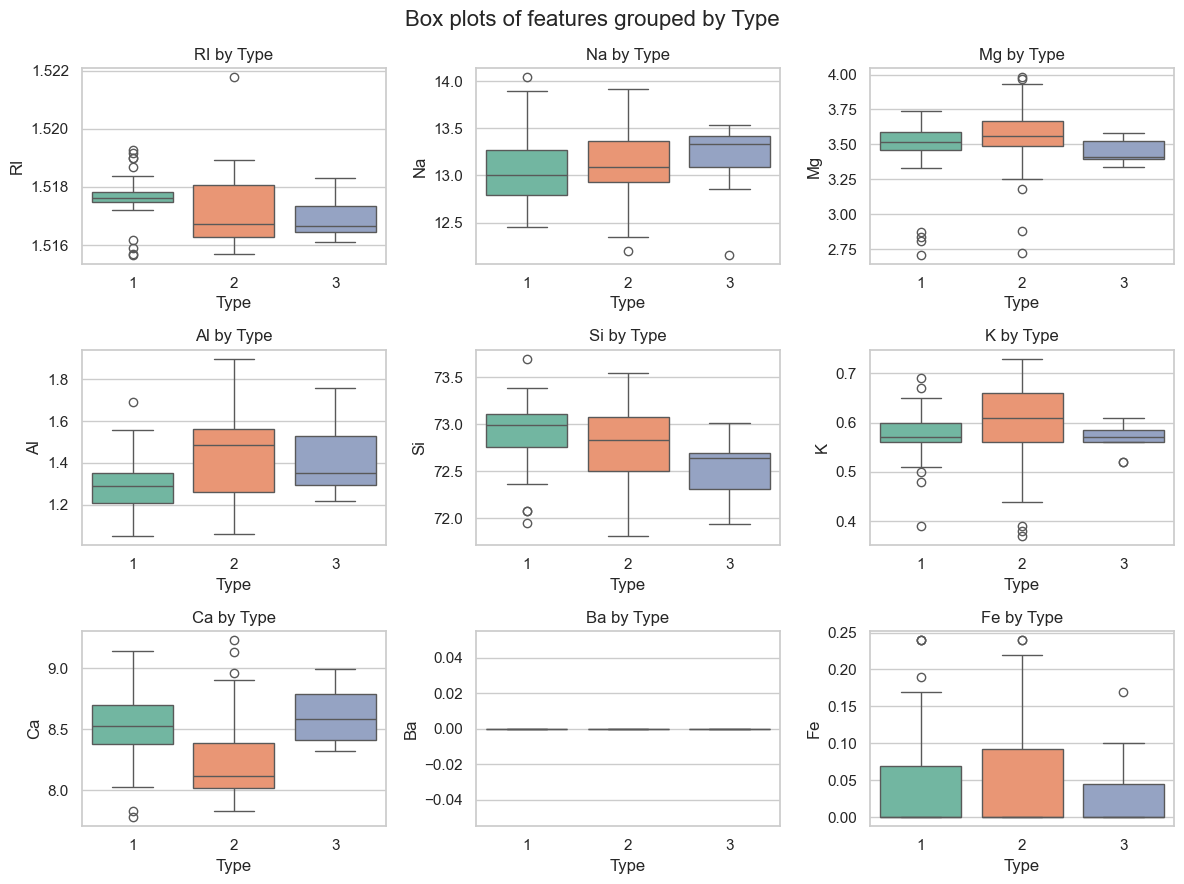

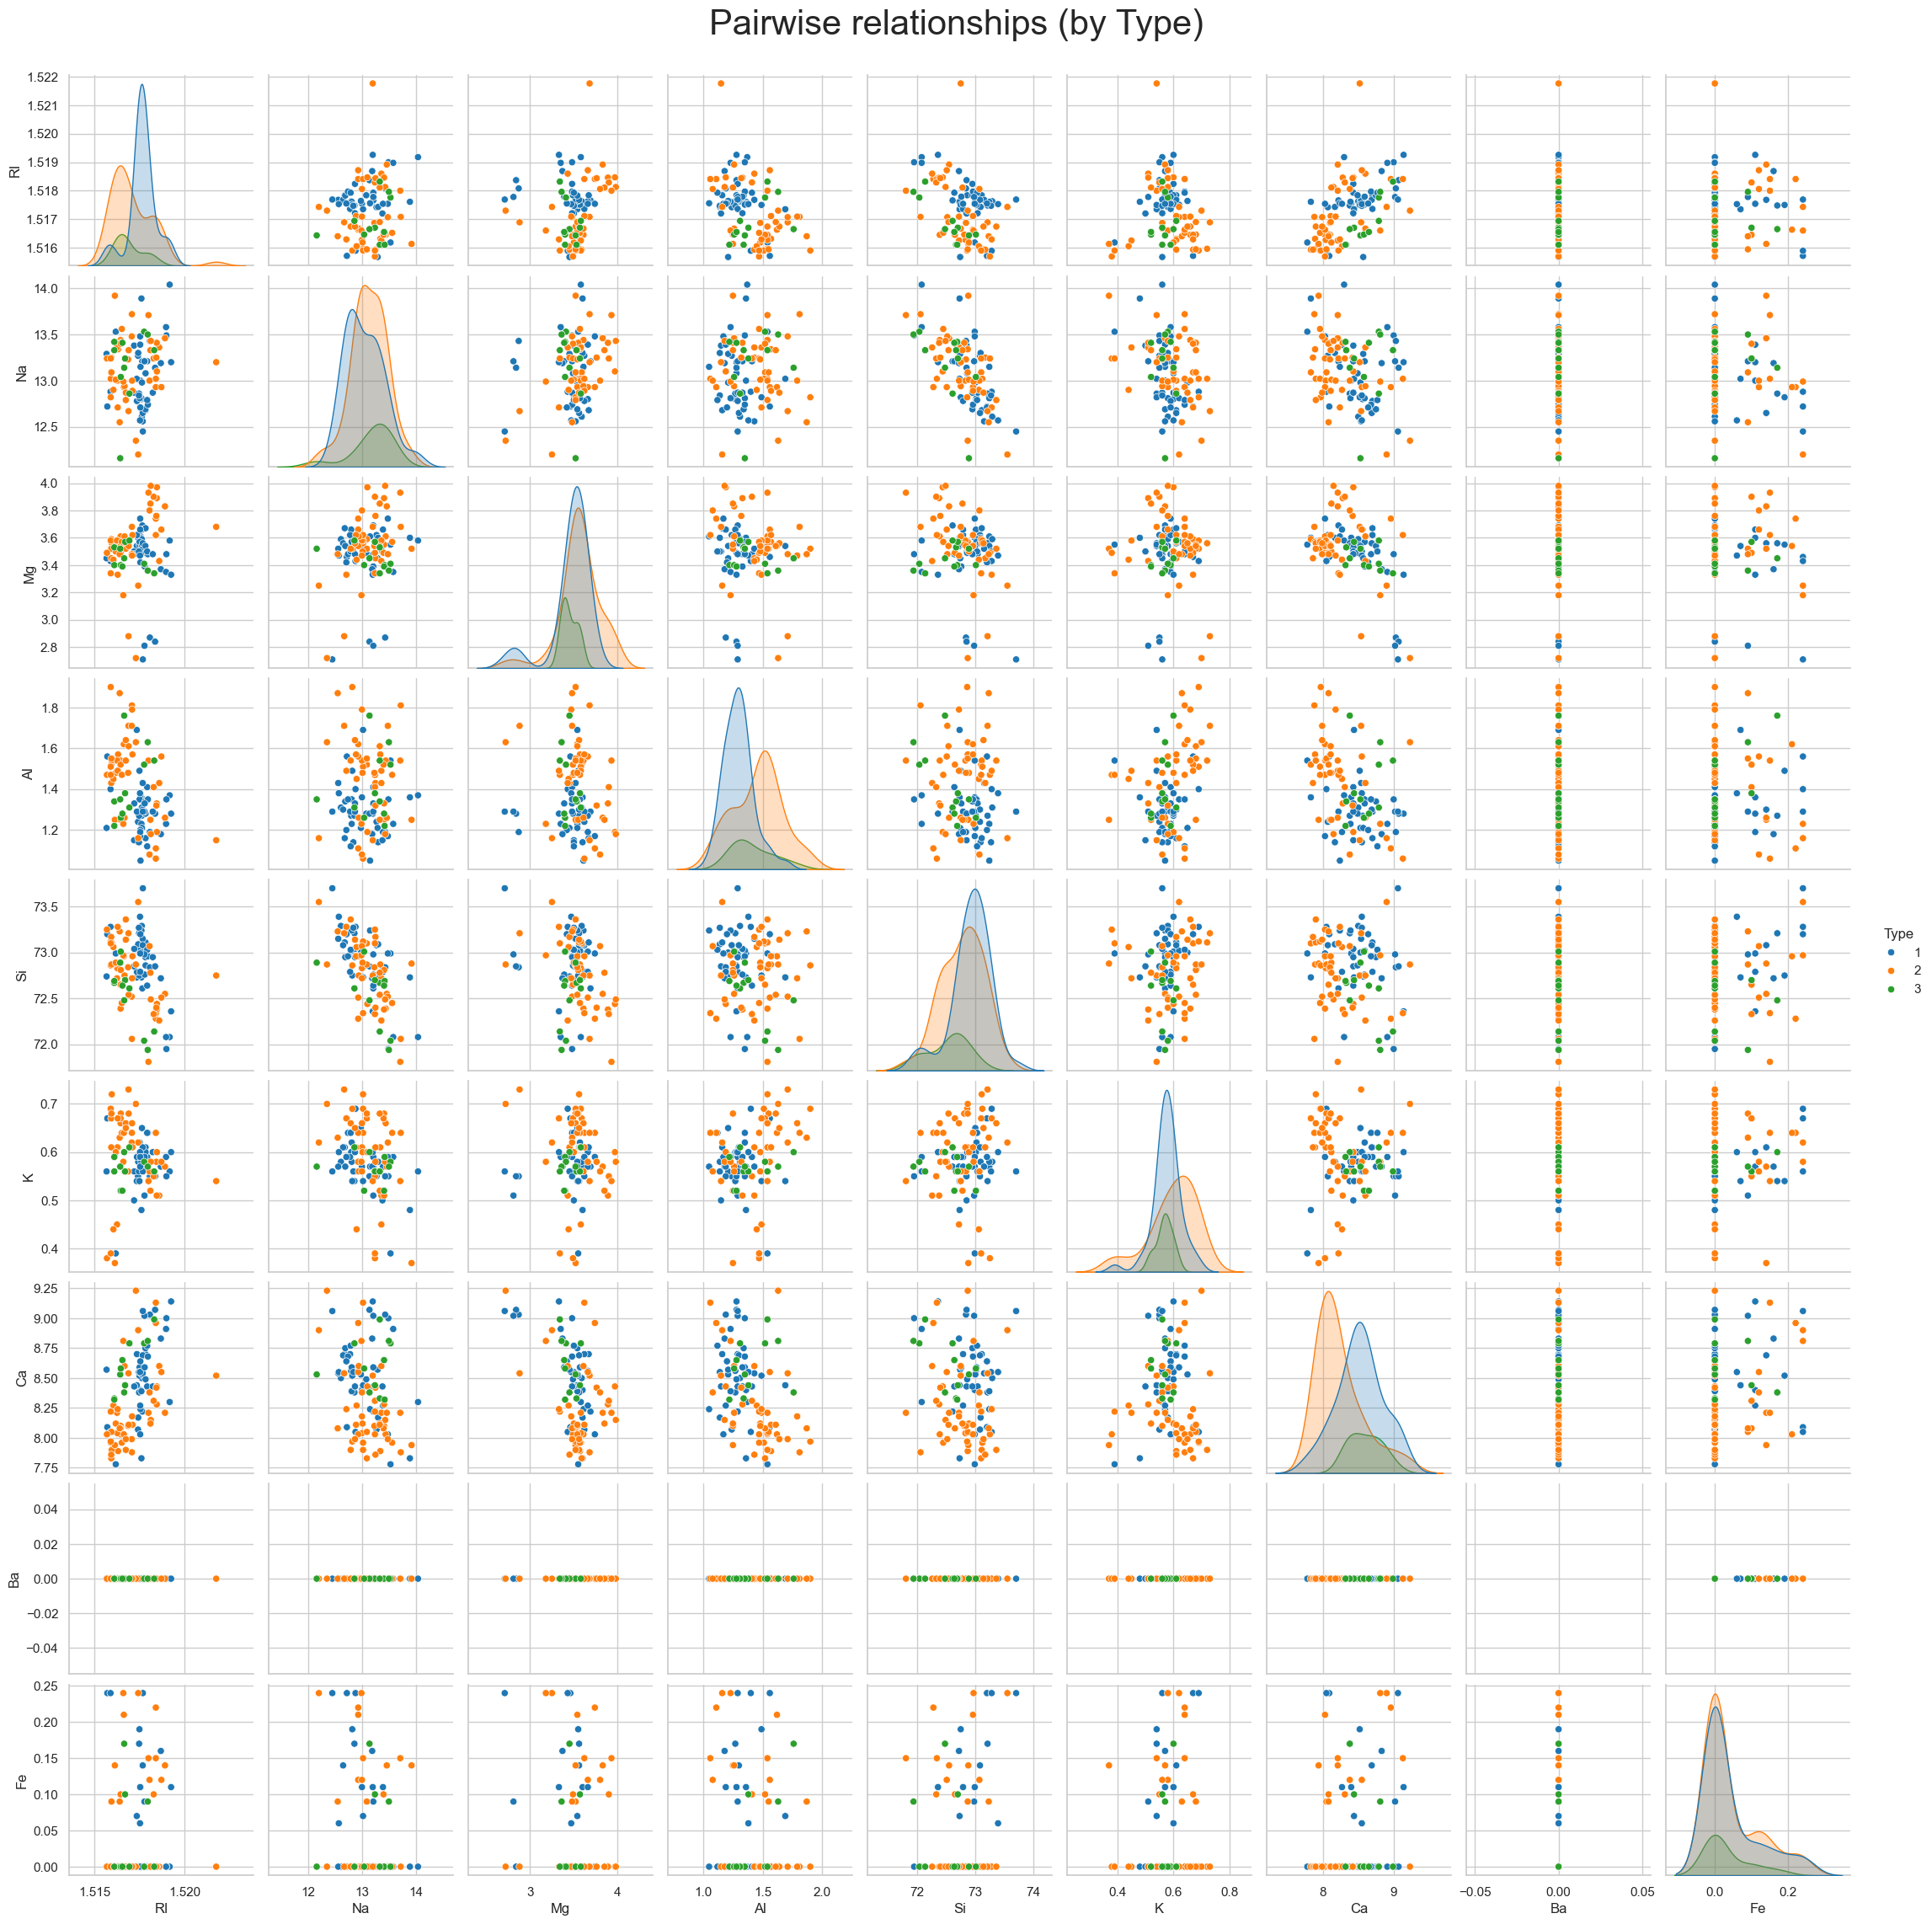

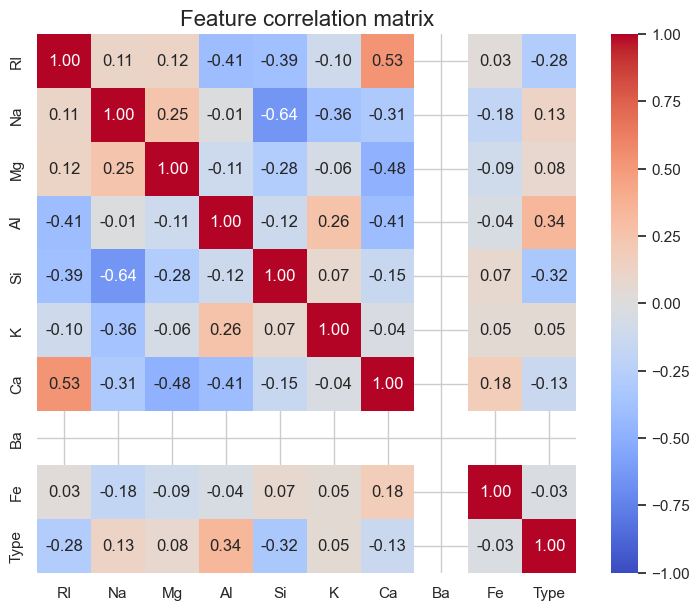

In [62]:
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

sns.set(style="whitegrid")

fig, axes = plt.subplots(3, 3, figsize=(12, 9))
plt.suptitle("Feature distributions", fontsize=16)
axes = axes.ravel()
for i, col in enumerate(df.columns[:-1]):
    sns.histplot(df[col], kde=True, ax=axes[i], color='C0')
    axes[i].set_title(f"{col} distribution")
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(3, 3, figsize=(12, 9))
plt.suptitle("Box plots of features grouped by Type", fontsize=16)
axes = axes.ravel()
for i, col in enumerate(df.columns[:-1]):
    sns.boxplot(x='Type', y=col, data=df, ax=axes[i], palette="Set2")
    axes[i].set_title(f"{col} by Type")
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)
plt.tight_layout()
plt.show()

sns.pairplot(df, vars=df.columns[:-1], hue='Type', diag_kind='kde', palette="tab10")
plt.suptitle("Pairwise relationships (by Type)", y=1.02, fontsize=30)
plt.show()

corr = df.corr()
plt.figure(figsize=(9, 7))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True, vmin=-1, vmax=1)
plt.title("Feature correlation matrix", fontsize=16)
plt.show()


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 104 entries, 1 to 160
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      104 non-null    float64
 1   Na      104 non-null    float64
 2   Mg      104 non-null    float64
 3   Al      104 non-null    float64
 4   Si      104 non-null    float64
 5   K       104 non-null    float64
 6   Ca      104 non-null    float64
 7   Ba      104 non-null    float64
 8   Fe      104 non-null    float64
 9   Type    104 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 8.9 KB


In [64]:
# there is no such object data    

In [65]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = df.drop('Type', axis=1)
y = df['Type']
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.292266,2.265044,0.409689,-0.123542,-0.234911,-1.548993,-1.623524,0.0,-0.579856
1,-1.134714,1.234503,0.186612,0.848185,0.475602,-2.877917,-1.766445,0.0,-0.579856
2,0.342160,0.318466,0.811226,-0.501436,-0.562840,-0.220068,-0.508743,0.0,-0.579856
3,0.102667,0.490223,0.498919,-0.771360,0.721549,-0.515384,-0.937505,0.0,-0.579856
4,0.112646,0.576101,0.409689,-1.311208,0.748877,-0.072409,-0.651663,0.0,-0.579856
...,...,...,...,...,...,...,...,...,...
99,-0.855305,-0.168179,-0.482617,-0.663390,0.530257,-0.958359,0.520286,0.0,-0.579856
100,-0.765495,0.890989,-0.527233,-0.555421,-0.480858,-0.958359,0.720375,0.0,-0.579856
101,0.441949,1.234503,-0.438002,0.740215,-2.120503,-0.072409,1.120553,0.0,-0.579856
102,0.641527,1.148624,-0.661079,1.334048,-2.393777,-0.220068,1.177721,0.0,0.653655


In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [71]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))
y_proba = rf.predict_proba(X_test)
print("ROC AUC Score (ovr, weighted):", roc_auc_score(y_test, y_proba, multi_class='ovr', average='weighted'))

Accuracy: 0.9047619047619048
Classification Report:
               precision    recall  f1-score   support

           1       0.89      0.89      0.89         9
           2       0.90      0.90      0.90        10
           3       1.00      1.00      1.00         2

    accuracy                           0.90        21
   macro avg       0.93      0.93      0.93        21
weighted avg       0.90      0.90      0.90        21

Confusion Matrix:
 [[8 1 0]
 [1 9 0]
 [0 0 2]]
Precision: 0.9047619047619048
Recall: 0.9047619047619048
F1 Score: 0.9047619047619048
ROC AUC Score (ovr, weighted): 0.9834054834054834


In [ ]:
from sklearn.ensemble import BaggingClassifier
bagging = BaggingClassifier(n_estimators=100, random_state=42)
bagging.fit(X_train, y_train)
y_pred_bagging = bagging.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))
y_proba = bagging.predict_proba(X_test)
print("ROC AUC Score (ovr, weighted):", roc_auc_score(y_test, y_proba, multi_class='ovr', average='weighted'))

Accuracy: 0.9047619047619048
Classification Report:
               precision    recall  f1-score   support

           1       0.89      0.89      0.89         9
           2       0.90      0.90      0.90        10
           3       1.00      1.00      1.00         2

    accuracy                           0.90        21
   macro avg       0.93      0.93      0.93        21
weighted avg       0.90      0.90      0.90        21

Confusion Matrix:
 [[8 1 0]
 [1 9 0]
 [0 0 2]]
Precision: 0.9047619047619048
Recall: 0.9047619047619048
F1 Score: 0.9047619047619048
ROC AUC Score (ovr, weighted): 0.9917027417027416


In [74]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=100, random_state=42)
gbc.fit(X_train, y_train)
y_pred_gbc = gbc.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))
y_proba = gbc.predict_proba(X_test)
print("ROC AUC Score (ovr, weighted):", roc_auc_score(y_test, y_proba, multi_class='ovr', average='weighted'))

Accuracy: 0.9047619047619048
Classification Report:
               precision    recall  f1-score   support

           1       0.89      0.89      0.89         9
           2       0.90      0.90      0.90        10
           3       1.00      1.00      1.00         2

    accuracy                           0.90        21
   macro avg       0.93      0.93      0.93        21
weighted avg       0.90      0.90      0.90        21

Confusion Matrix:
 [[8 1 0]
 [1 9 0]
 [0 0 2]]
Precision: 0.9047619047619048
Recall: 0.9047619047619048
F1 Score: 0.9047619047619048
ROC AUC Score (ovr, weighted): 0.975108225108225


## 1. Explain Bagging and Boosting methods. How is it different from each other.
* Bagging (Bootstrap Aggregating) and Boosting are both ensemble learning techniques used to improve the performance of machine learning models.
* Bagging works by training multiple models (usually of same type) independently using different subsets of the training data obtain through bootstrapping and then the final prediction is made by aggregating the predictions of all models (e.g., majority voting for classification or averaging for regression).
* Boosting, on the other hand, trains models sequentially, with each new model focusing on the errors made by the previous ones. This helps to reduce bias and improve overall accuracy.
* In summary, Bagging is parallel and reduces variance, while Boosting is sequential and reduces bias.

## 2. Explain how to handle imbalance in the data.
Handling imbalanced data is crucial for building effective machine learning models. Here are some common techniques:
1. Resampling Techniques:
    - Oversampling: Increase the number of instances in the minority class by duplicating examples or generating synthetic examples (e.g., SMOTE).
    - Undersampling: Reduce the number of instances in the majority class by randomly removing examples.
2. Use Different Evaluation Metrics:
    -  Instead of accuracy, use metrics like precision, recall, F1-score, and ROC-AUC that provide better insight into model performance on imbalanced data.
3. Algorithmic Approaches:
    - Use algorithms that are robust to class imbalance (e.g., tree-based methods).
    - Modify existing algorithms to incorporate class weights, giving more importance to the minority class.
4. Ensemble Methods:
    - Use ensemble techniques like Bagging and Boosting that can help improve performance on imbalanced datasets.